# Basic Signal Processing

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## From Digital to Analog

### Digital vs physical frequency

**Discrete time:**
* n: no physical dimension (just a counter)
* periodicity: how many *samples* before pattern repeats

**Physical world:**
* periodicity: how many *seconds* before pattern repeats
* frequency measured in Hz ($s^{-1}$)

### Example – PC playing sound

**Discrete-time sinusoid:** $x[n]=sin(\omega_0 n + \theta)$
* set $T_s$, time in seconds between samples
* periodicity of $M$ samples $\rightarrow$ periodicity of $MT_s$ seconds
* real world frequency: $f=\frac{1}{MT_s}Hz$
* usually we choose $F_s$ the number of samples per second
* $T_s = 1/F_s$

E.g for a typical value of $F_s=48000$, $T_s\approx 20.8 \mu s$. If $M=110$

$f \approx 440Hz$

In [2]:
Fs = 48000
Ts = 1/Fs
M = 110

In [3]:
f = round(1/(M*Ts));f

436

Suppose the system clock of PC instead has an associated frequency of $44kHz$. What is the period of a discrete-time sinusoid stored on your computer that corresponds to $A_5(880Hz)$?

In [4]:
Fs = 44000
Ts = 1/Fs

We know that $f=\frac{1}{MT_s}$. Thus $M=F_s/f$.

In [5]:
f = 880
M = Fs/f; M

50.0

## Building Blocks

#### Adder

In [6]:
def add_block(x, y):
    return x + y

#### Multiplier

In [7]:
def multiply_block(x, alpha):
    return x * alpha

#### Arbitrary Delay

In [8]:
def delay_block(x, N):
    z = range(0,N)
    z.append(x)
    return z[0:len(x)]

### Example: 2-point Moving Average

* simple average: $m=\frac{a+b}{2}$
* moving average: take "local" average: $y[n]=\frac{x[n]+x[n-1]}{2}$

### Reversing the loop:
* $y[n]=x[n]+\alpha y[n-M]$

### Creating loops:
* $y[n] = \alpha y[n-M]+\overline x[n]$

## Music

* build a recursion loop with delay of $M$
* choose a signal $\overline x[n]$ that is nonzero only for $0\leq n < M$
* choose a decay factor
* input $\overline x[n]$ to the system
* play the output

#### Example: Playing a sine wave

$M=100$, $\alpha=1$, $\overline x[n]=sin(2\pi n/100)$ for $0 \leq n < 100$ and zero elsewhere


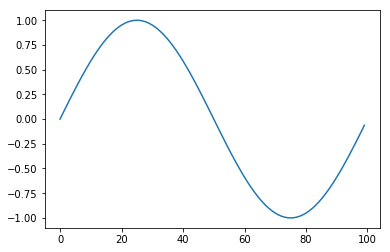

In [9]:
M = 100
alpha = 1
t = np.arange(0, M)
x = np.sin(2*np.pi*(t/M))

plt.plot(t,x)
plt.show()

In [11]:
# TODO: input to the system and play music
Fs = 48000
Ts = 1/Fs
f = round(1/(M*Ts));f

480

* **M** controls frequency (pitch)
* **$\alpha$** controls envelope (decay)
* **$\overline x[n]$** controls color (timbre)

#### Example: Playing a proto-violin
$M=100$, $\alpha=0.95$, $\overline x[n]$: zero-mean sawtooth wave between 0 and 99, zero elsewhere

In [13]:
# TODO: match above example
M = 100
alpha = 0.95

#### The Karplus-Strong Algorithm
$M=100$, $\alpha=0.9$, $\overline x[n]$: 100 random values between 0 and 99, zero elsewhere

## Goethe's temperature measurement

#### Smoothing the Time-Series

* Moving average: 
$$y[n]=\frac{1}{N}\sum^{N-1}_{m=0}x(n-m)$$

* N: window of last observations over which average is computed

#### A Recursive Method

$$y[n]=\frac{1}{N} \sum^{N-1}_{m=0}x(n-m)$$

$$ y[n]= \frac{1}{N} x[n] + \frac{1}{N}\sum^{N-1}_{m=1}x(n-m)+\frac{1}{N}x[n-N]-\frac{1}{N}x[n-N]$$

* $y[n-1] = + \frac{1}{N}\sum^{N-1}_{m=1}x(n-m)+\frac{1}{N}x[n-N]$

$$ y[n] = y[n-1]+\frac{1}{N}(x[n]-x[n-N])$$
